**Let's start with importing the libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

**This step is to import the data.**

In [2]:
Data = pd.read_csv('/content/Vehicle_Insurance.csv')

In [3]:
# This is to view the first few rows of the dataset
Data.head()

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1    Male   44                1         28.0                   0   
1   2    Male   76                1          3.0                   0   
2   3    Male   47                1         28.0                   0   
3   4    Male   21                1         11.0                   1   
4   5  Female   29                1         41.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0   > 2 Years            Yes         40454.0                  26.0    217.0   
1    1-2 Year             No         33536.0                  26.0    183.0   
2   > 2 Years            Yes         38294.0                  26.0     27.0   
3    < 1 Year             No         28619.0                 152.0    203.0   
4    < 1 Year             No         27496.0                 152.0     39.0   

   Response  
0       1.0  
1       0.0  
2       1.0  
3       0.0  
4       0.0

**This step is to find the sum of null values in the Data set**

In [4]:
Data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             1
Vehicle_Damage          1
Annual_Premium          1
Policy_Sales_Channel    1
Vintage                 1
Response                1
dtype: int64

**This step is to get the mean, median and etc. for the data set.**

In [5]:
Data.describe()

id            Age  Driving_License    Region_Code  \
count  354405.000000  354405.000000    354405.000000  354405.000000   
mean   177203.000000      38.813603         0.997884      26.397531   
std    102308.055414      15.500885         0.045954      13.232660   
min         1.000000      20.000000         0.000000       0.000000   
25%     88602.000000      25.000000         1.000000      15.000000   
50%    177203.000000      36.000000         1.000000      28.000000   
75%    265804.000000      49.000000         1.000000      35.000000   
max    354405.000000      85.000000         1.000000      52.000000   

       Previously_Insured  Annual_Premium  Policy_Sales_Channel  \
count       354405.000000   354404.000000         354404.000000   
mean             0.457937    30556.903475            112.085408   
std              0.498228    17224.081990             54.174460   
min              0.000000     2630.000000              1.000000   
25%              0.000000    24395.000000             29.000000   
50%              0.000000    31660.000000            134.000000   
75%              1.000000    39391.000000            152.000000   
max              1.000000   540165.000000            163.000000   

             Vintage       Response  
count  354404.000000  354404.000000  
mean      154.362620       0.122961  
std        83.664171       0.328393  
min        10.000000       0.000000  
25%        82.000000       0.000000  
50%       154.000000       0.000000  
75%       227.000000       0.000000  
max       299.000000       1.000000

**This step gives us information regarding the whole data set.**

In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354405 entries, 0 to 354404
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    354405 non-null  int64  
 1   Gender                354405 non-null  object 
 2   Age                   354405 non-null  int64  
 3   Driving_License       354405 non-null  int64  
 4   Region_Code           354405 non-null  float64
 5   Previously_Insured    354405 non-null  int64  
 6   Vehicle_Age           354404 non-null  object 
 7   Vehicle_Damage        354404 non-null  object 
 8   Annual_Premium        354404 non-null  float64
 9   Policy_Sales_Channel  354404 non-null  float64
 10  Vintage               354404 non-null  float64
 11  Response              354404 non-null  float64
dtypes: float64(5), int64(4), object(3)
memory usage: 32.4+ MB


In [7]:
# To remove duplicate rows based on all columns
Data.drop_duplicates(inplace=True)

In [8]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354405 entries, 0 to 354404
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    354405 non-null  int64  
 1   Gender                354405 non-null  object 
 2   Age                   354405 non-null  int64  
 3   Driving_License       354405 non-null  int64  
 4   Region_Code           354405 non-null  float64
 5   Previously_Insured    354405 non-null  int64  
 6   Vehicle_Age           354404 non-null  object 
 7   Vehicle_Damage        354404 non-null  object 
 8   Annual_Premium        354404 non-null  float64
 9   Policy_Sales_Channel  354404 non-null  float64
 10  Vintage               354404 non-null  float64
 11  Response              354404 non-null  float64
dtypes: float64(5), int64(4), object(3)
memory usage: 32.4+ MB


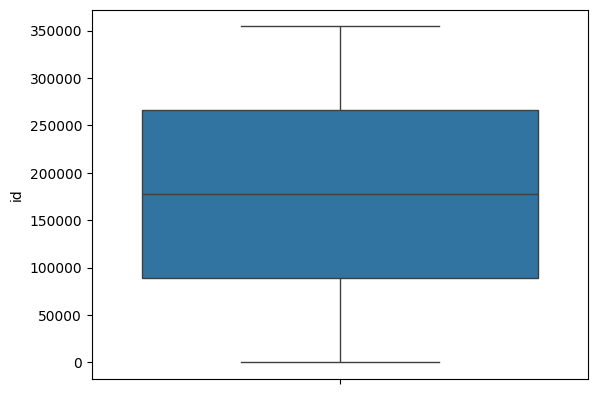

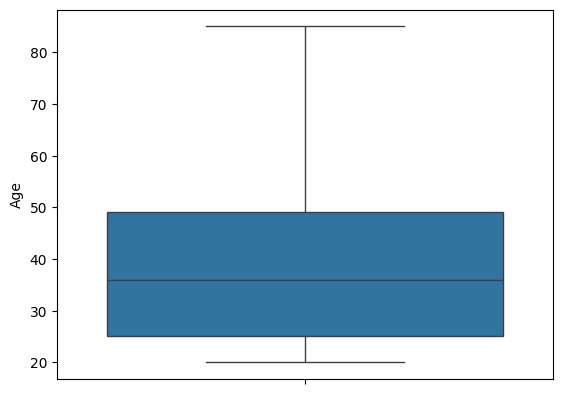

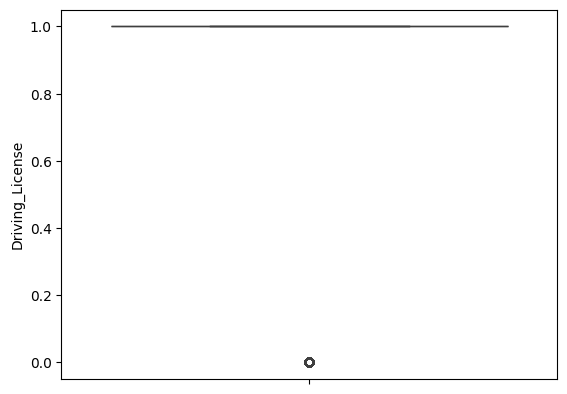

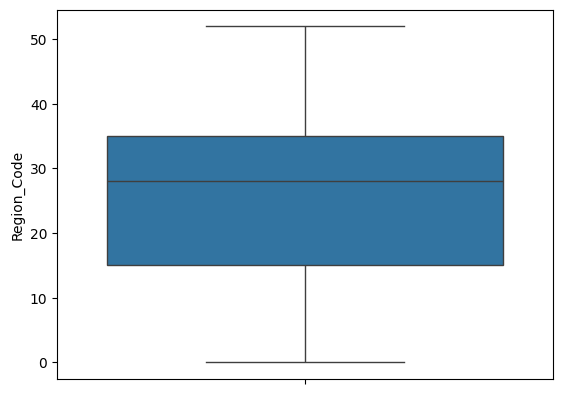

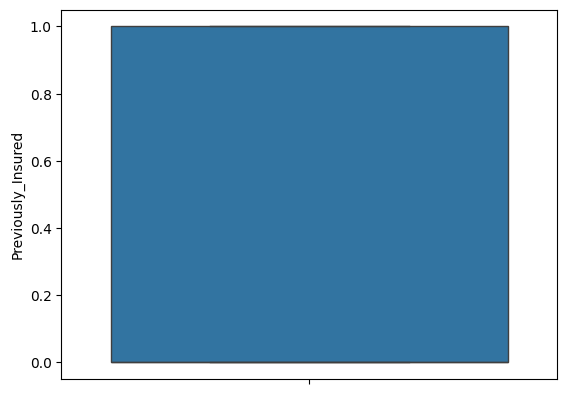

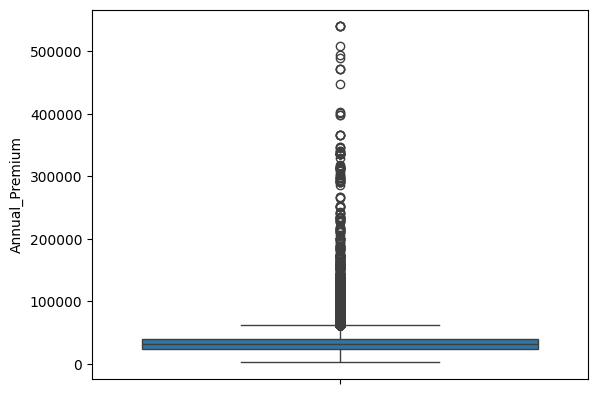

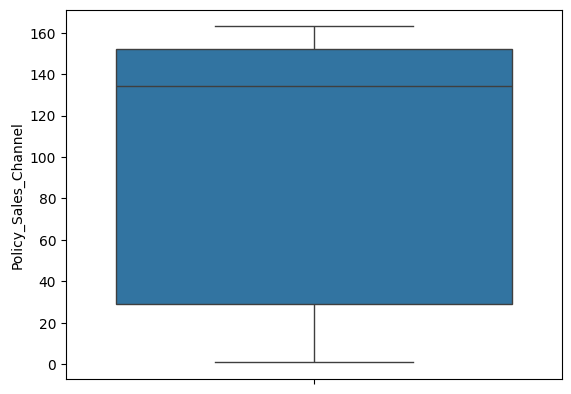

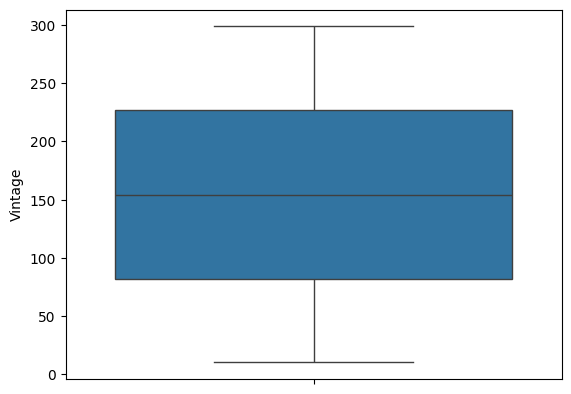

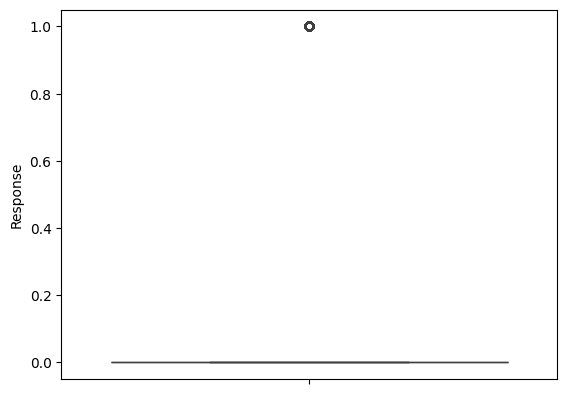

In [9]:
# Drawing boxplot to identify the outliers in the data set
for column in Data.columns:
  if pd.api.types.is_numeric_dtype(Data[column]):
    plt.figure()
    sns.boxplot(Data[column])

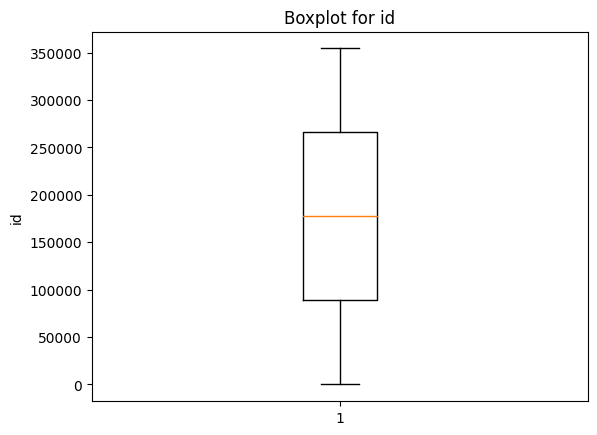

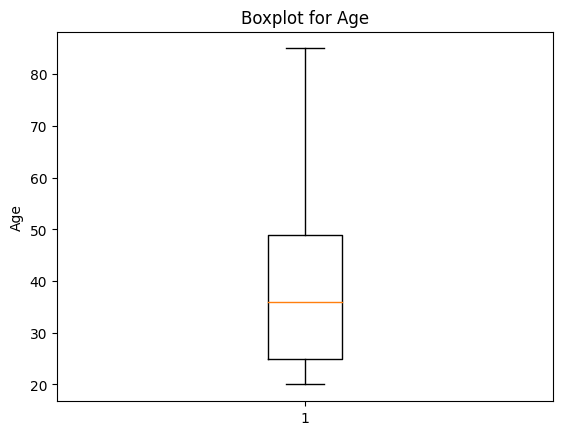

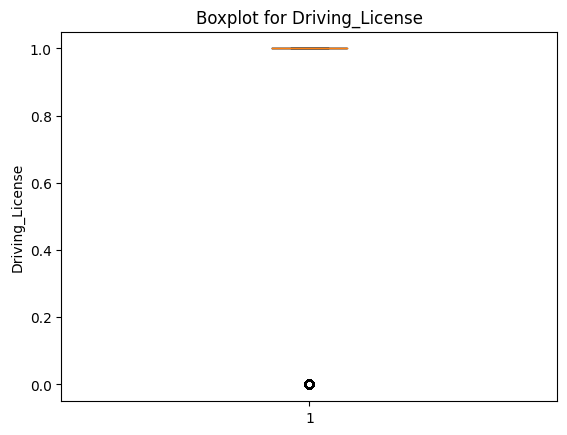

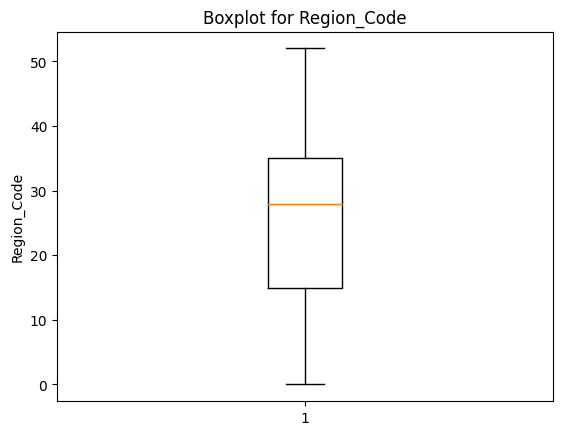

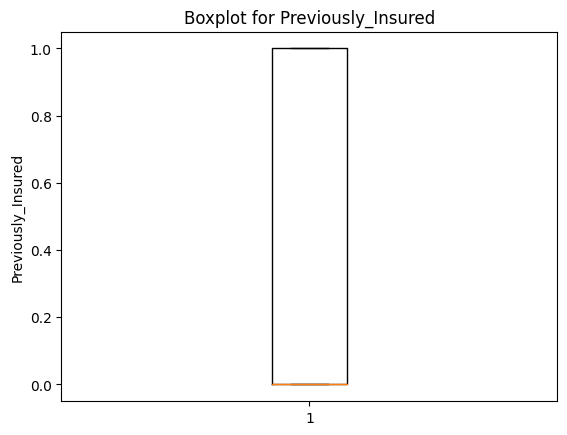

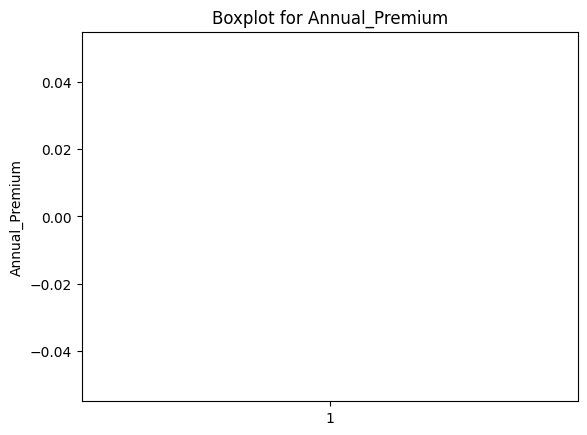

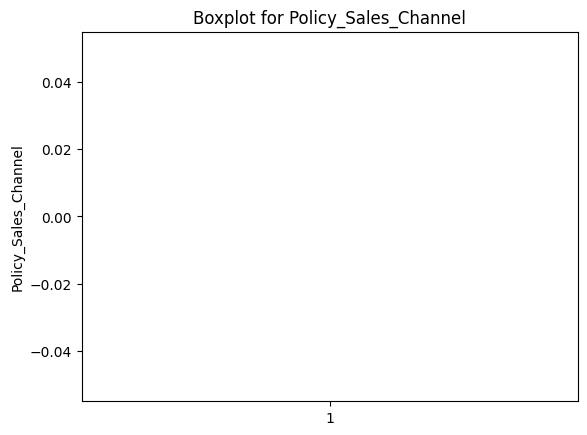

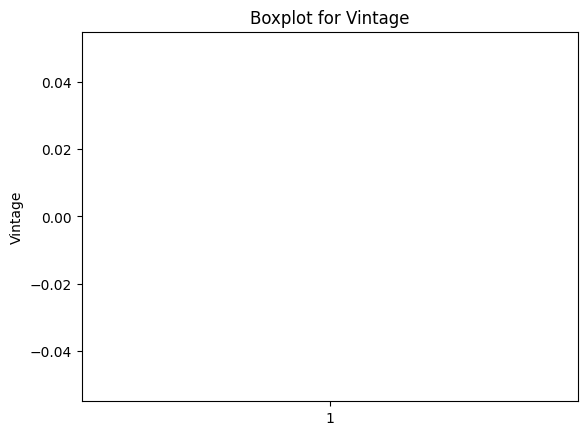

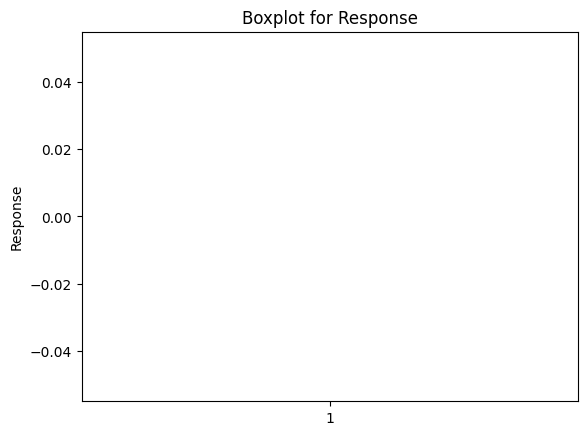

In [11]:
# Drawing the boxplots to identify the outliers in all columns.

for column in Data.columns:
  if pd.api.types.is_numeric_dtype(Data[column]):
    plt.figure()
    plt.boxplot(Data[column])
    plt.title(f"Boxplot for {column}")
    plt.ylabel(column)
    plt.show()

In [12]:
#Replacing the outliers in the Annual Premium column with the median.

def replace_outliers_with_median(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound),
                          df[column].median(), df[column])
    return df

Data = replace_outliers_with_median(Data, 'Annual_Premium')

**Since the ouliers and the missing values are handled now we are moving forward with the Data Vizualization.**

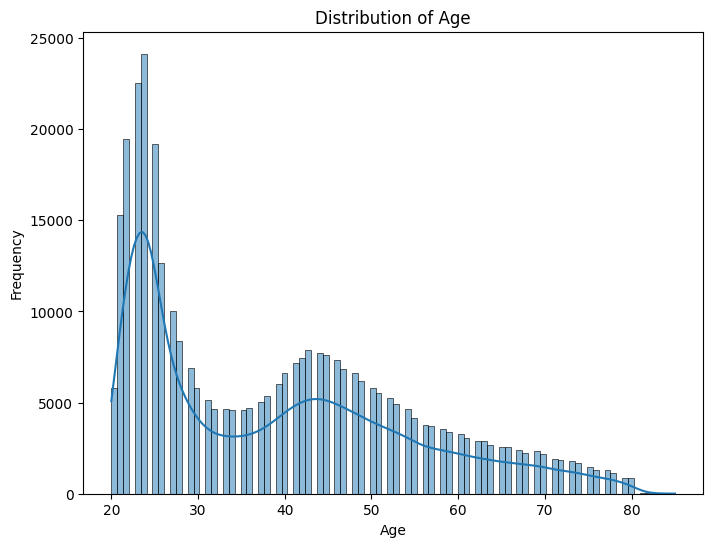

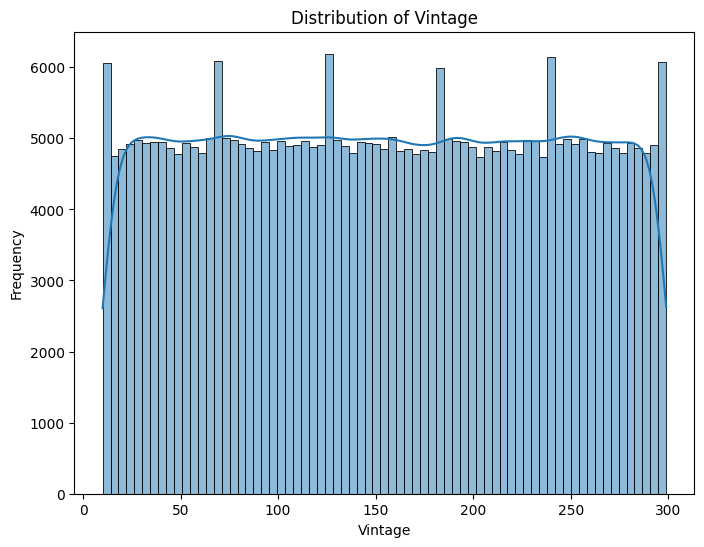

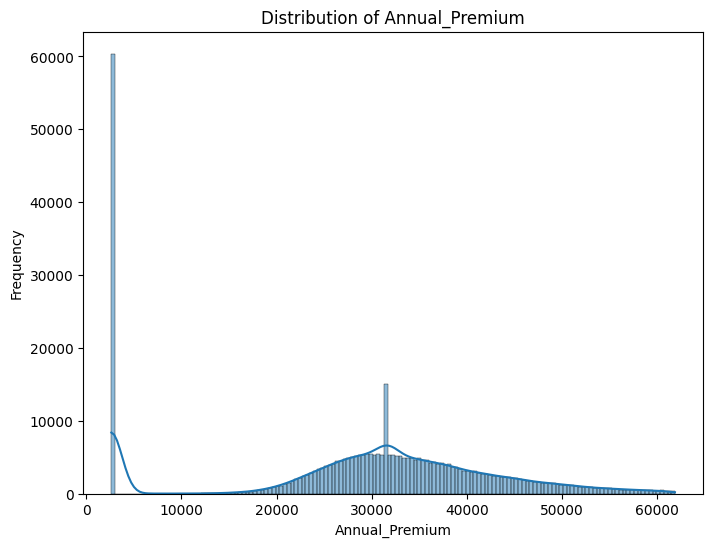

In [13]:
# Now we are utilizing various visualization techniques to explore the distribution of key variables.

# Histograms for numerical features
for col in ['Age', 'Vintage', 'Annual_Premium']:
    plt.figure(figsize=(8, 6))
    sns.histplot(Data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


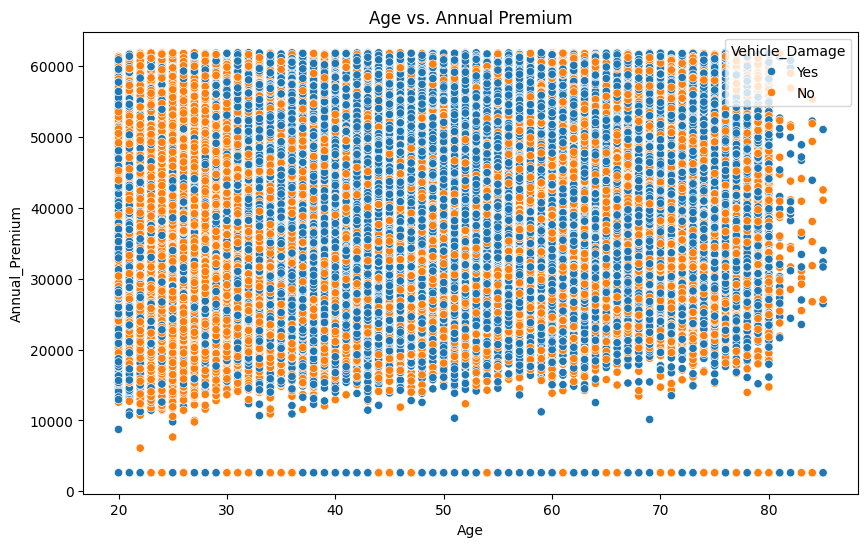

In [14]:
# Scatter plots to explore relationships between variables
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Annual_Premium', data=Data, hue='Vehicle_Damage')
plt.title('Age vs. Annual Premium')
plt.show()


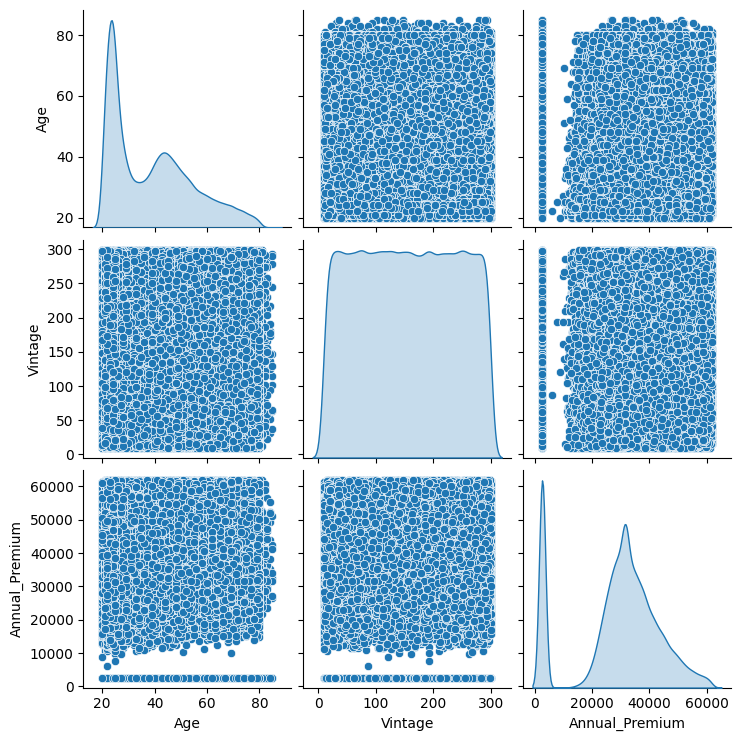

In [15]:
# Pairplot for multiple numerical variables
sns.pairplot(Data[['Age', 'Vintage', 'Annual_Premium']], diag_kind='kde')
plt.show()


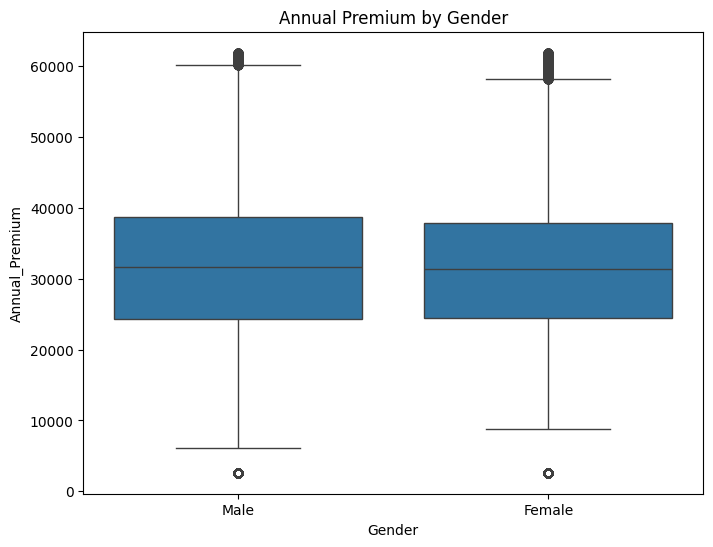

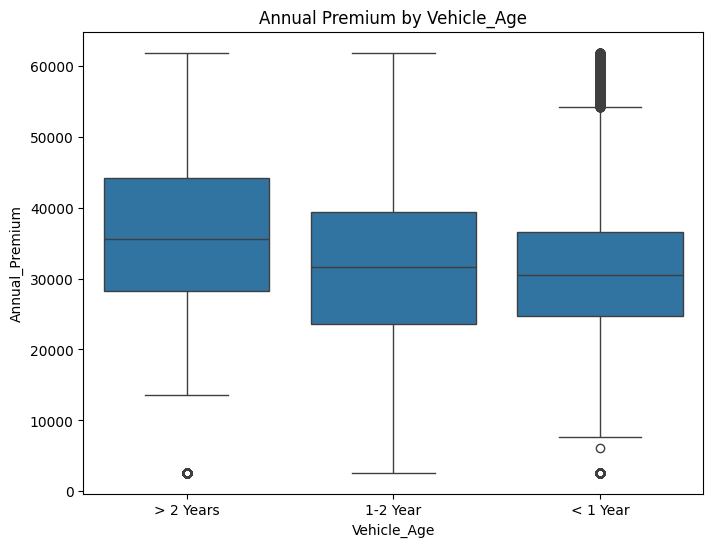

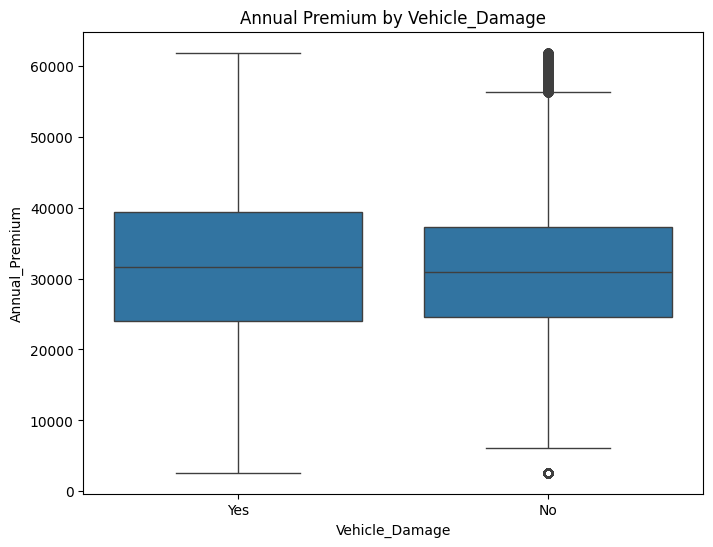

In [16]:
# Box plots for categorical features
for col in ['Gender', 'Vehicle_Age', 'Vehicle_Damage']:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=col, y='Annual_Premium', data=Data)
    plt.title(f'Annual Premium by {col}')
    plt.show()

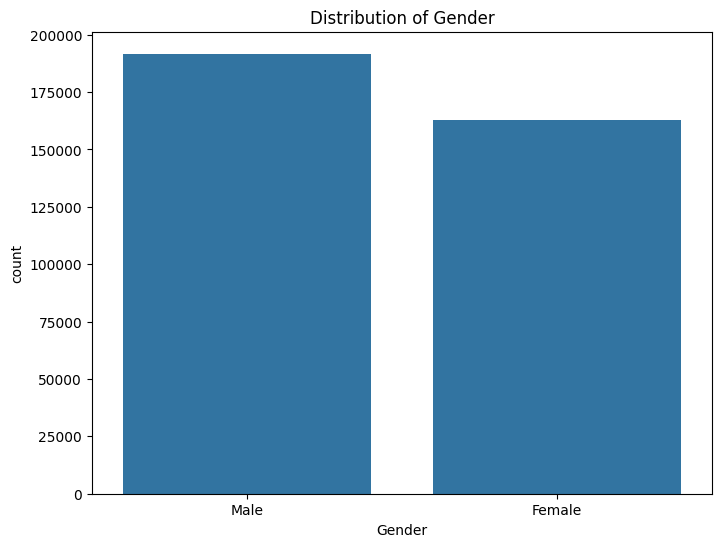

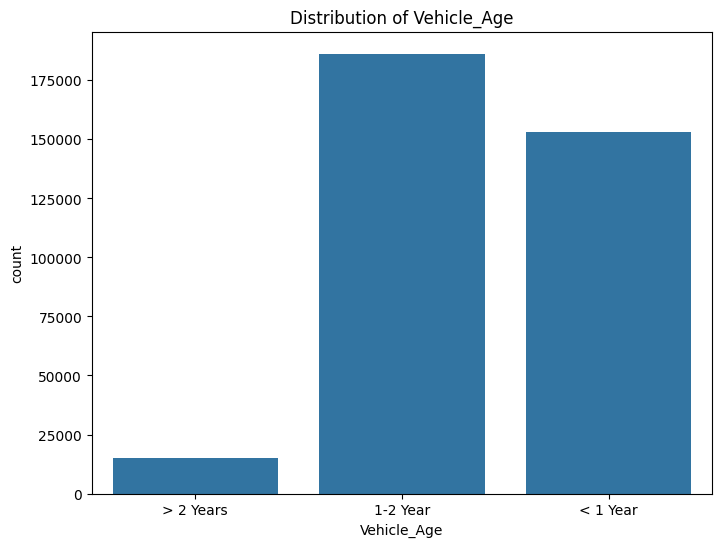

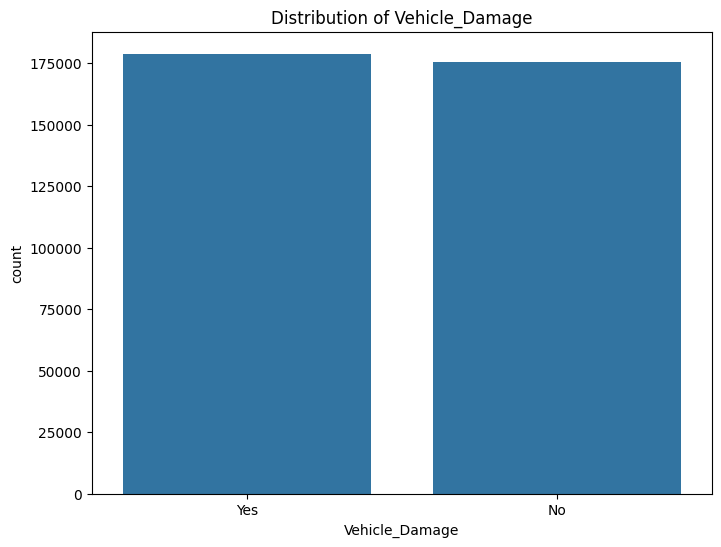

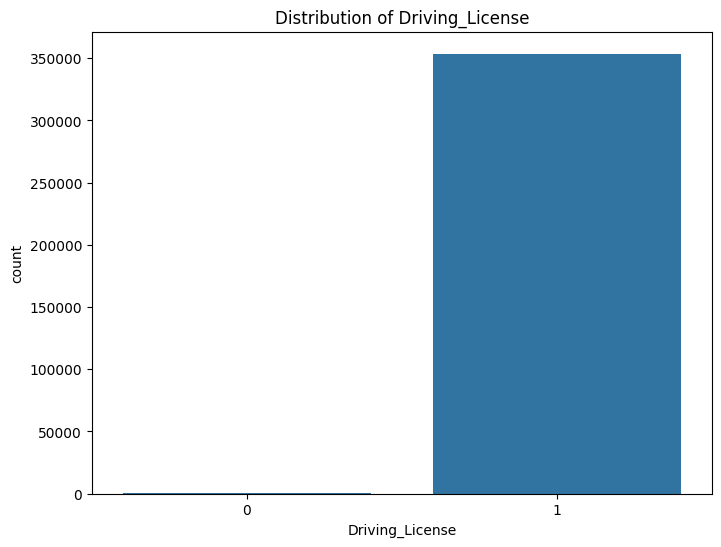

In [17]:
# Count plots for categorical features
for col in ['Gender', 'Vehicle_Age', 'Vehicle_Damage', 'Driving_License']:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=Data)
    plt.title(f'Distribution of {col}')
    plt.show()

In [18]:
# Interactive plot using Plotly
fig = px.histogram(Data, x='Annual_Premium', color='Vehicle_Damage', marginal='box',
                   title='Annual Premium Distribution by Vehicle Damage',
                   labels={'Annual_Premium': 'Annual Premium'})
fig.show()

**Here's a summary of key insights from the data visualization code's:**

1. **Data Cleaning:** The code begins by handling missing values and outliers. Outliers in the 'Annual_Premium' column are replaced with the median value.  This is crucial for reliable analysis as outliers can skew results.

2. **Distribution of Numerical Variables:** Histograms reveal the distribution of 'Age', 'Vintage', and 'Annual_Premium'.  These visualizations help understand the central tendency, spread, and skewness of these variables.  The code also checks for normality using kernel density estimates (KDE).

3. **Relationship between Age and Annual Premium:** The scatter plot of 'Age' vs. 'Annual_Premium', colored by 'Vehicle_Damage', shows a potential correlation between age and annual premium and how vehicle damage status influences this relationship.

4. **Relationships between Numerical Variables:** The pairplot visualizes the relationships between 'Age', 'Vintage', and 'Annual_Premium', including their individual distributions (using KDE plots). This helps to identify potential correlations or dependencies between these variables.

5. **Impact of Categorical Variables on Annual Premium:** Box plots illustrate how 'Gender', 'Vehicle_Age', and 'Vehicle_Damage' affect 'Annual_Premium'. They show the distribution of premiums within each category and help identify potential differences in premiums based on these factors.

6. **Distribution of Categorical Variables:** Count plots visualize the frequency of each category in 'Gender', 'Vehicle_Age', 'Vehicle_Damage', and 'Driving_License', giving an overview of the distribution of these categorical variables within the dataset.

7. **Interactive Visualization:** The Plotly histogram provides an interactive way to explore the distribution of 'Annual_Premium', broken down by 'Vehicle_Damage'.  The inclusion of a box plot in the margin enhances the understanding of the distribution's central tendency, spread, and potential outliers.

**Now the data vizualization step is completed. Let's move on to the Feature Analysis (Target variable - Insurace Claims or Response column)**

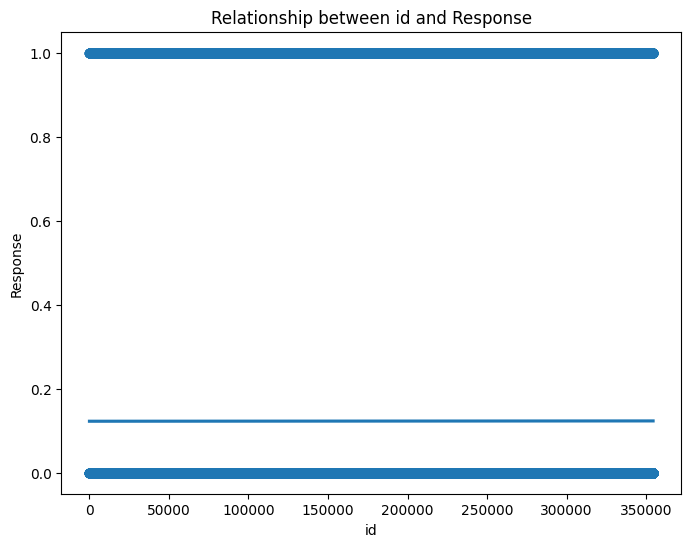

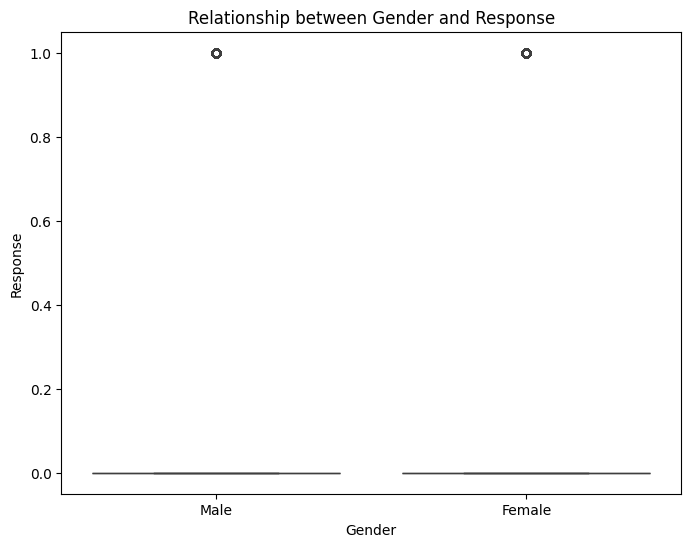

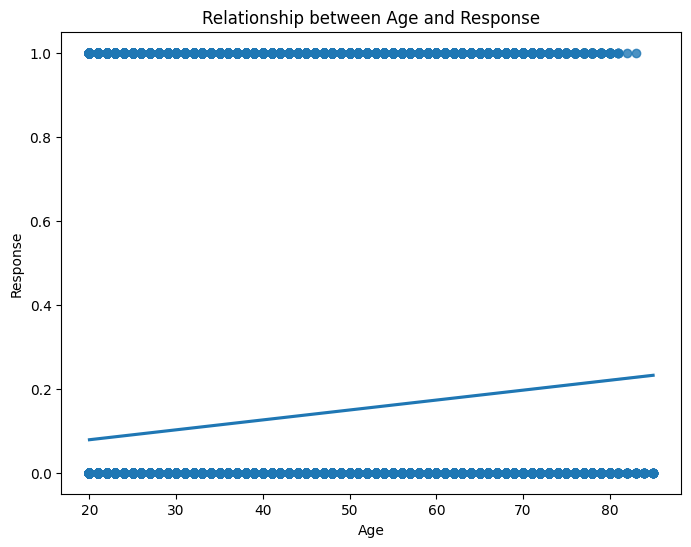

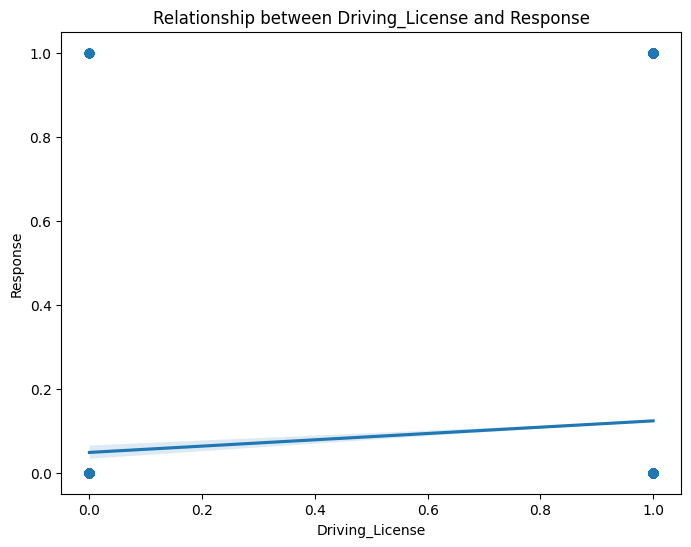

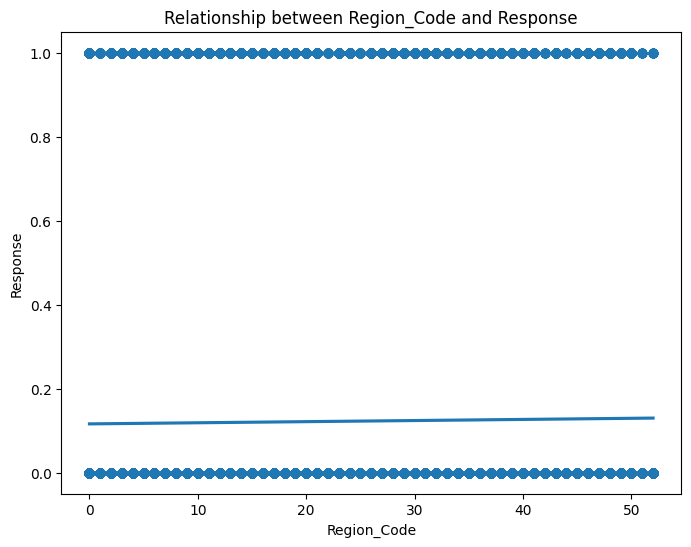

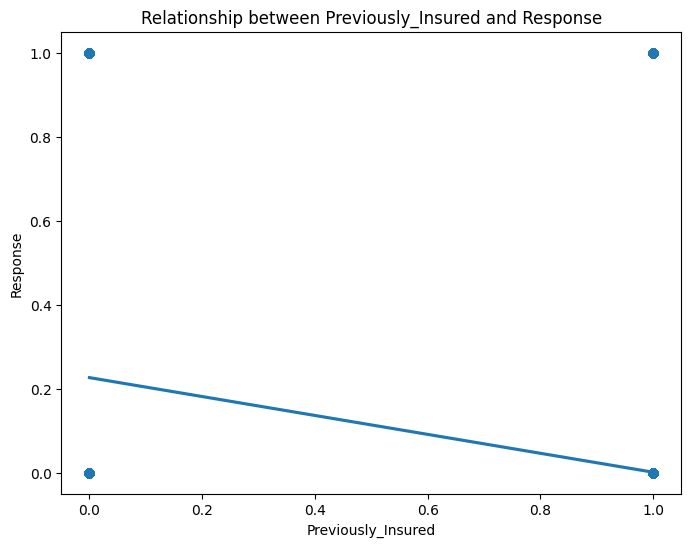

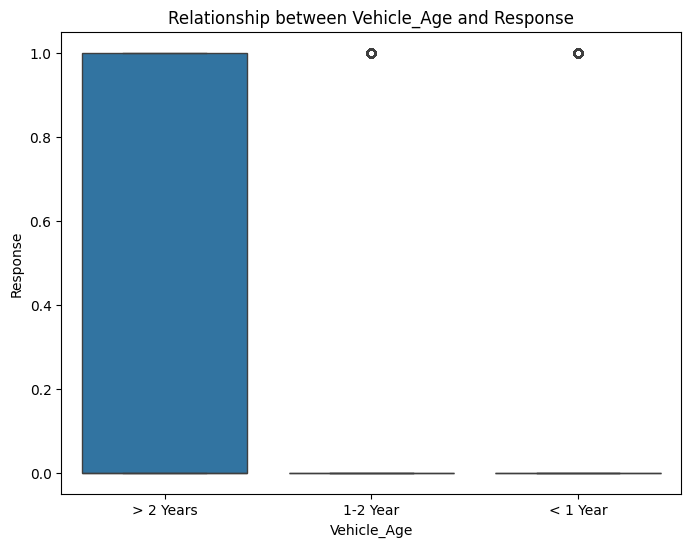

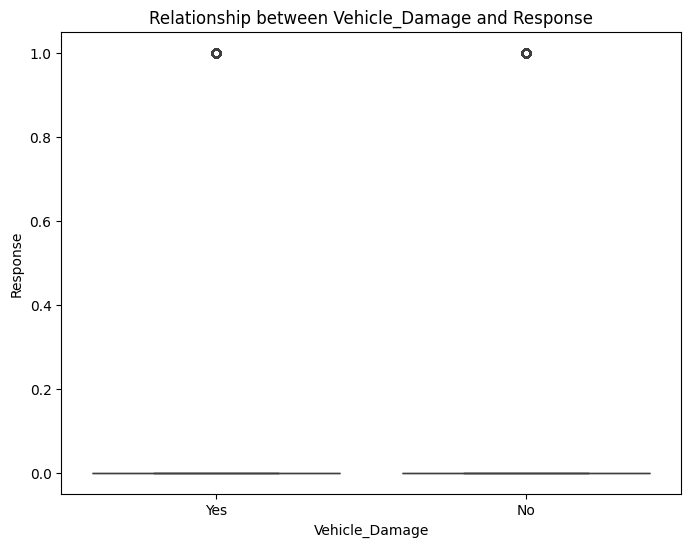

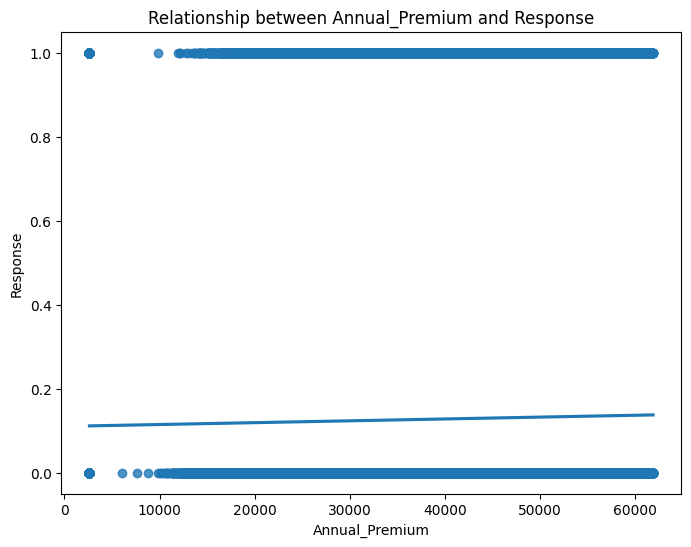

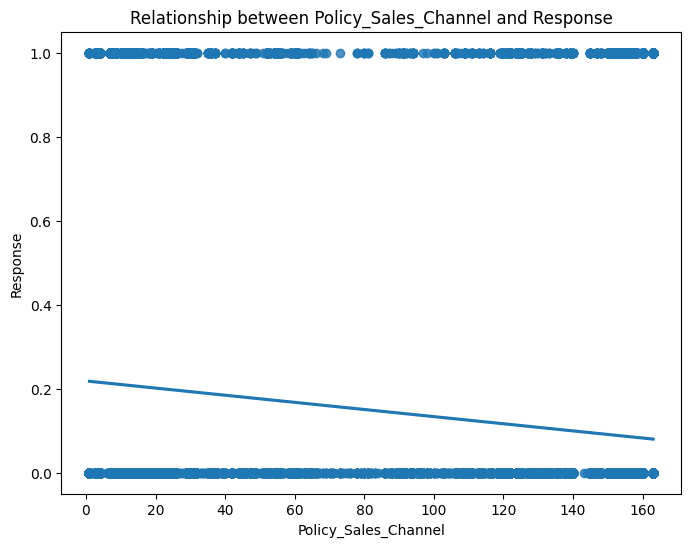

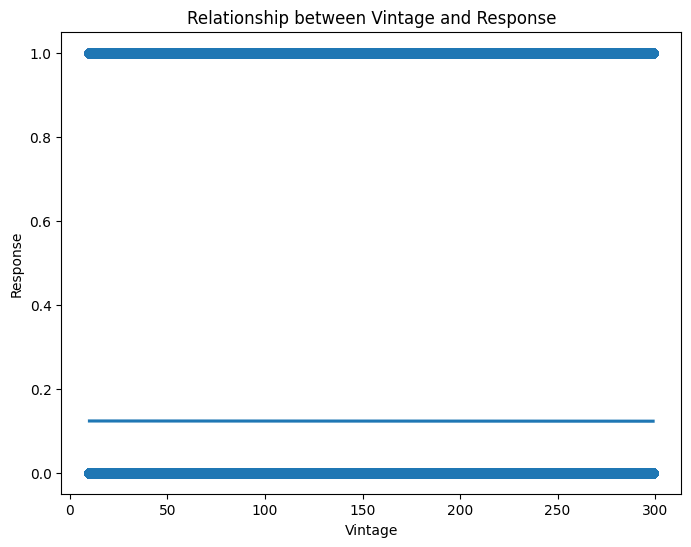

In [22]:
# Analyze the relationship between features and the target variable ('Response')

for column in Data.columns:
    if column != 'Response':  # Exclude the target variable itself
        if pd.api.types.is_numeric_dtype(Data[column]):
            plt.figure(figsize=(8, 6))
            sns.regplot(x=column, y='Response', data=Data)
            plt.title(f'Relationship between {column} and Response')
            plt.show()
        else:  # Categorical features
            plt.figure(figsize=(8, 6))
            sns.boxplot(x=column, y='Response', data=Data)
            plt.title(f'Relationship between {column} and Response')
            plt.show()

In [25]:
# Calculate the correlation between features and the target variable
# Select only numeric columns before calculating correlation
numeric_data = Data.select_dtypes(include=np.number)
correlation_with_response = numeric_data.corr()['Response'].drop('Response') # Drop self correlation

print("Correlation with Response Variable:\n", correlation_with_response)

Correlation with Response Variable:
 id                      0.000654
Age                     0.111417
Driving_License         0.010512
Region_Code             0.010702
Previously_Insured     -0.341637
Annual_Premium          0.019536
Policy_Sales_Channel   -0.140131
Vintage                -0.000445
Name: Response, dtype: float64


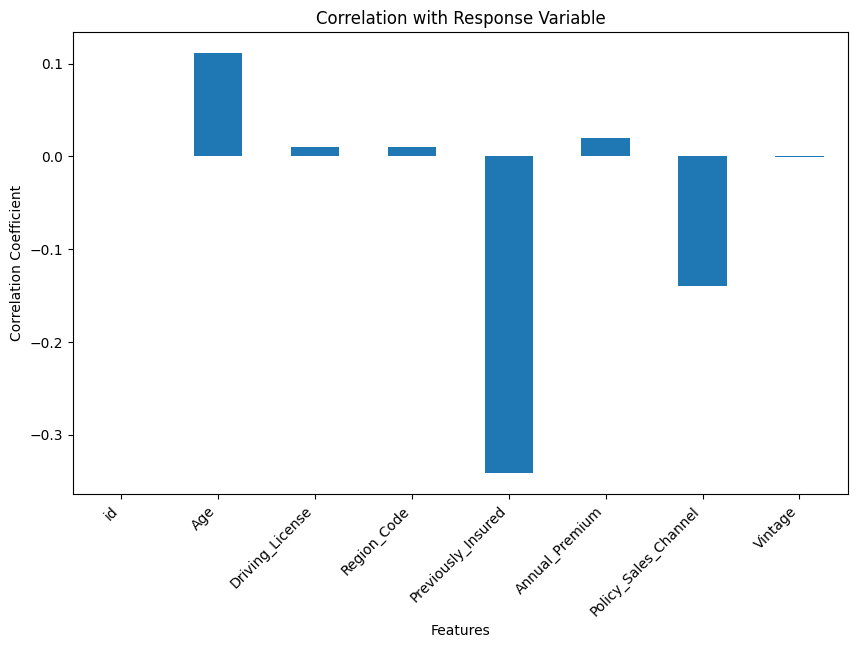

In [26]:
# Visualize correlations with a bar plot
plt.figure(figsize=(10, 6))
correlation_with_response.plot(kind='bar')
plt.title('Correlation with Response Variable')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')
plt.show()

**The feature analysis code investigates the relationship between various features in the dataset and the target variable, 'Response'. Here's a breakdown of the key insights:**

1. **Visual Exploration of Feature Relationships:**  The code iterates through each feature (excluding 'Response').  For numerical features, it uses regression plots (`sns.regplot`) to visualize the linear relationship with 'Response'.  For categorical features, box plots (`sns.boxplot`) show the distribution of 'Response' for each category, revealing potential differences in the target variable based on the categorical feature.

2. **Correlation Analysis (Numerical Features):**  The code calculates the correlation coefficients between numerical features and the 'Response' variable.  This quantifies the linear association between each numerical feature and the target variable.  Positive correlations suggest that as the feature value increases, the likelihood of a positive 'Response' also increases, while negative correlations indicate the opposite.  The strength of the correlation is indicated by the absolute value of the coefficient (closer to 1 indicates a stronger linear relationship).  A bar plot then visualizes these correlations.


**Interpreting the Results:**

The visualizations and correlation coefficients provide crucial insights into which features might be important predictors of 'Response'.  Strong correlations (positive or negative) suggest that the corresponding features are likely significant in predicting the outcome.  Visualizations (especially the box plots for categorical variables) can also highlight non-linear relationships or interactions that might not be fully captured by correlation coefficients.  For example, if a box plot for a categorical variable shows significantly different distributions of the target variable between categories, that variable is likely important even if the correlation coefficient is weak or non-existent.

# **Summarization**

**Here's a summary of the key processes and factors:**

**1. Data Loading and Initial Exploration:**

* **Key Factors:**  The process begins by loading the dataset and performing initial checks.  `Data.head()`, `Data.isnull().sum()`, `Data.describe()`, and `Data.info()` provide crucial initial insights into the data's structure, summary statistics, and the presence of missing values.
* **Key Process:** The code imports necessary libraries (NumPy, Pandas, Matplotlib, Seaborn, Plotly) and reads the CSV file into a Pandas DataFrame.

**2. Data Cleaning:**

* **Key Factors:** Duplicate rows are removed, and outliers in the 'Annual_Premium' column are addressed by replacing them with the median. Outlier handling is vital to prevent skewed results.
* **Key Process:**  `Data.drop_duplicates()` eliminates redundant entries. A function `replace_outliers_with_median` uses the IQR method to detect and replace outliers.

**3. Data Visualization:**

* **Key Factors:** Various visualization techniques are used. Histograms show variable distributions, scatter plots explore relationships between variables (e.g., age and annual premium), pair plots visualize multiple numerical variables' relationships. Box plots illustrate how categorical variables (gender, vehicle age, damage) influence the annual premium. Count plots show the frequency of categories. Plotly is used for interactive visualizations.
* **Key Process:** The code uses Seaborn and Matplotlib functions for static visualizations and Plotly for interactive ones.  The goal is to understand the data's characteristics, patterns, and potential correlations.

**4. Feature Analysis (Target Variable - 'Response'):**

* **Key Factors:** The analysis focuses on the relationship between features and the target variable ('Response'), which likely represents insurance claims or a similar binary outcome. Regression plots for numerical features and box plots for categorical features visualize these relationships. Correlation coefficients quantify the linear relationships between numerical features and 'Response', aiding in identifying potentially important predictors.
* **Key Process:** Correlation analysis and visualization help determine which features significantly impact the target variable.

**Overall Highlights:**

* **Comprehensive EDA:** The code demonstrates a systematic approach to EDA, covering data cleaning, exploration, and feature analysis.
* **Variety of Visualization Techniques:**  The use of multiple visualization types provides a comprehensive understanding of the dataset.
* **Focus on Target Variable:** The code explicitly investigates how different features relate to the target variable, essential for predictive modeling.
* **Handling Missing Values and Outliers:**  The code correctly addresses data quality issues, critical for meaningful analysis.
* **Interactive Visualization:**  The use of Plotly adds an interactive dimension to the exploration, offering more flexibility and depth to the analysis.


This thorough analysis equips a data scientist to select relevant features and choose appropriate modeling techniques for the vehicle insurance dataset.